In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [3]:
# First let's find all of our data
distinctPath = '/Users/kolbt/Desktop/variedAlpha/distinctEpsilon'
distDataPath = distinctPath + '/diameter_data/txts'
equalPath = '/Users/kolbt/Desktop/variedAlpha/equalEpsilon'
equalDataPath = equalPath + '/diameter_data/txts'

# Go to the correct parent directory
os.chdir(distinctPath)
distFiles = os.listdir(distDataPath)
nDistFiles = len(distFiles)

os.chdir(equalPath)
equalFiles = os.listdir(equalDataPath)
nEqualFiles = len(equalFiles)

In [4]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def varSort(arr):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for alpha
    cpy = np.copy(arr)
    ind = np.arange(0, len(arr))
    for i in xrange(len(cpy)):
        for j in xrange(len(cpy)):
            # Sort by first variable
            if cpy[i] > cpy[j] and i < j:
                # Swap copy array values
                cpy[i], cpy[j] = cpy[j], cpy[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]    
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [5]:
# You want to load the data in so that it's sorted to begin with
os.chdir(distDataPath)
distAlpha = []
for i in xrange(nDistFiles):
    distAlpha.append(getFromTxt(distFiles[i], "alpha", ".txt"))
    
# Now sort the array of txtFile names
indArr = varSort(distAlpha)
indSort(distAlpha, indArr)
indSort(distFiles, indArr)

os.chdir(equalDataPath)
equalAlpha = []
for i in xrange(nEqualFiles):
    equalAlpha.append(getFromTxt(equalFiles[i], "alpha", ".txt"))
    
# Now sort the array of txtFile names
indArr = varSort(equalAlpha)
indSort(equalAlpha, indArr)
indSort(equalFiles, indArr)

In [6]:
# Read in the data in pandas dataframes
dist_sims = []
os.chdir(distDataPath)
for i in xrange(nDistFiles):
    df = pd.read_csv(distFiles[i], sep='\s+', header=0)
    dist_sims.append(df)
    
equal_sims = []
os.chdir(equalDataPath)
for i in xrange(nEqualFiles):
    df = pd.read_csv(equalFiles[i], sep='\s+', header=0)
    equal_sims.append(df)

In [7]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(nDistFiles):
    myBool = chkSort(dist_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(distFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(distFiles[i])
        
# Check to see if timesteps are in order
for i in xrange(nEqualFiles):
    myBool = chkSort(equal_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(equalFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(equalFiles[i])

diam_pa0_pb500_xa50_ep12_alpha1.txt sorted... 
diam_pa0_pb500_xa50_ep22_alpha2.txt sorted... 
diam_pa0_pb500_xa50_ep33_alpha3.txt sorted... 
diam_pa0_pb500_xa50_ep43_alpha4.txt sorted... 
diam_pa0_pb500_xa50_ep22_alpha1.txt sorted... 
diam_pa0_pb500_xa50_ep43_alpha2.txt sorted... 
diam_pa0_pb500_xa50_ep64_alpha3.txt sorted... 
diam_pa0_pb500_xa50_ep85_alpha4.txt sorted... 


In [8]:
display(dist_sims[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,...,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0.0,5000,5000,10000,0,0,0,8,0,8,...,1.0010,1.0010,1.0139,1.0091,0.6,6.3,0.0,1.27,0.00,0.76
1,220.0,5000,5000,10000,0,0,0,8,1,9,...,1.0012,1.0300,1.0002,1.0008,0.6,7.5,0.0,1.21,0.00,0.76
2,242.0,5000,5000,10000,0,0,0,8,2,10,...,1.0007,0.9979,0.9996,1.0005,0.6,7.8,0.0,1.28,0.00,0.76
3,264.0,5000,5000,10000,0,0,0,2,8,10,...,0.9991,1.0043,0.9991,0.9997,0.6,7.9,0.0,1.27,0.00,0.76
4,286.0,5000,5000,10000,0,0,0,8,2,10,...,0.9991,0.9845,1.0000,0.9991,0.6,7.7,0.0,1.31,0.00,0.76
5,308.0,5000,5000,10000,0,0,0,4,10,14,...,1.0004,0.9779,1.0004,0.9993,0.6,10.8,0.0,1.29,0.00,0.76
6,330.0,5000,5000,10000,0,0,0,7,6,13,...,1.0008,1.0068,1.0012,1.0008,0.6,10.3,0.0,1.26,0.00,0.76
7,352.0,5000,5000,10000,0,0,0,6,6,12,...,0.9989,1.0050,1.0013,0.9983,0.6,9.5,0.0,1.27,0.00,0.76
8,374.0,5000,5000,10000,0,0,0,4,8,12,...,0.9989,1.0300,0.9989,1.0000,0.6,9.6,0.0,1.25,0.00,0.76
9,396.0,5000,5000,10000,0,0,0,10,9,19,...,0.9987,0.9922,0.9998,0.9987,0.6,14.8,0.0,1.29,0.00,0.76


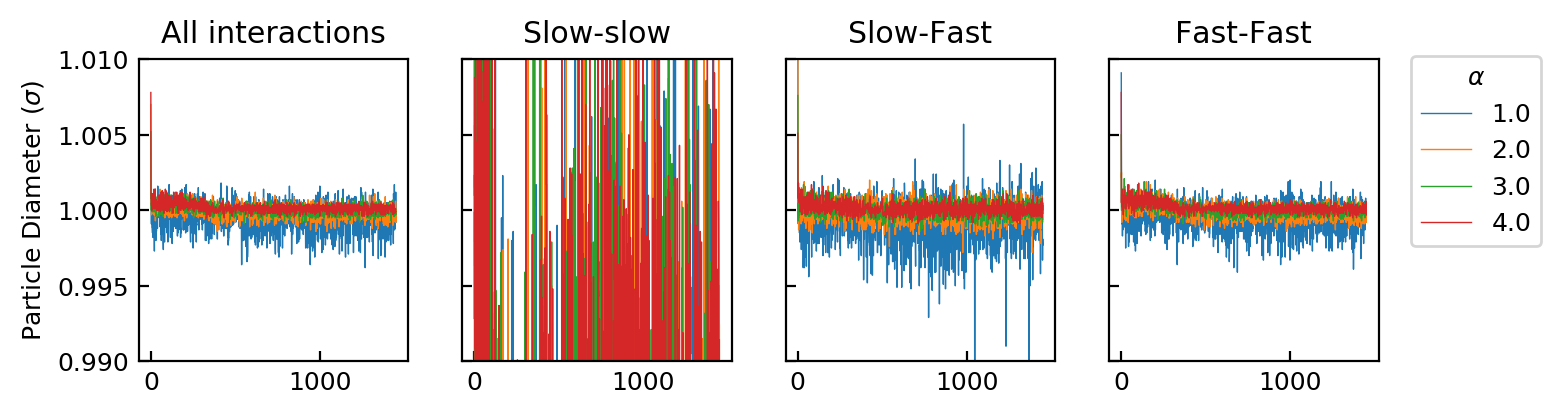

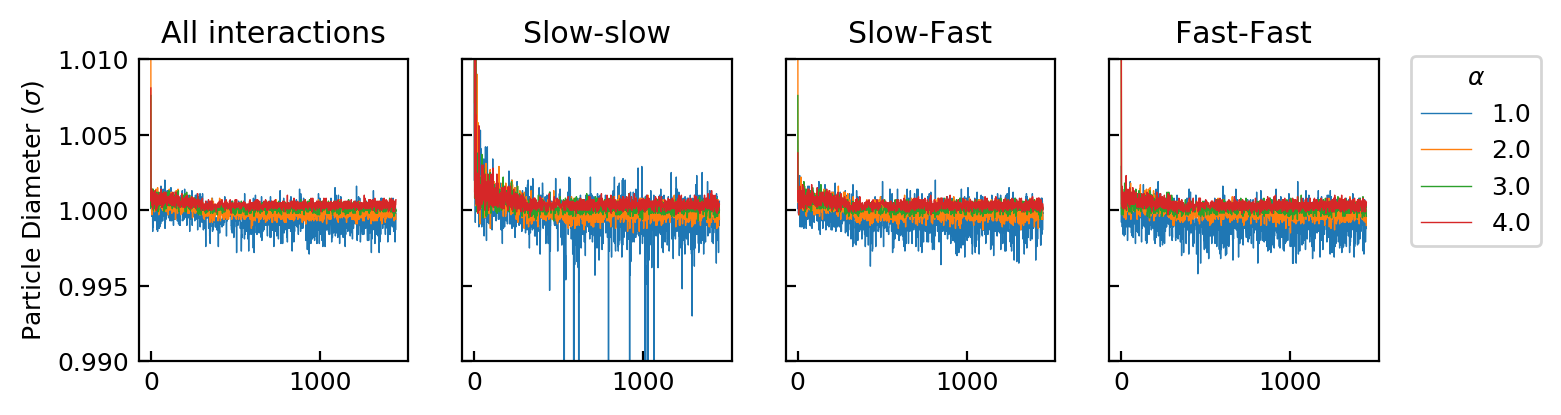

In [19]:
# Make sure I haven't messed up my data
dist_xs = np.arange(0, len(dist_sims[0]['Timestep']))

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(nDistFiles):
    ax[0].plot(dist_xs, dist_sims[i]['sigALL'], label=distAlpha[i])
    ax[1].plot(dist_xs, dist_sims[i]['sigAA'], label=distAlpha[i])
    ax[2].plot(dist_xs, dist_sims[i]['sigAB'], label=distAlpha[i])
    ax[3].plot(dist_xs, dist_sims[i]['sigBB'], label=distAlpha[i])
ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$\alpha$', loc = 4, bbox_to_anchor=(1.65, 0.34))
plt.show()


equal_xs = np.arange(0, len(equal_sims[0]['Timestep']))

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(nEqualFiles):
    ax[0].plot(equal_xs, equal_sims[i]['sigALL'], label=equalAlpha[i])
    ax[1].plot(equal_xs, equal_sims[i]['sigAA'], label=equalAlpha[i])
    ax[2].plot(equal_xs, equal_sims[i]['sigAB'], label=equalAlpha[i])
    ax[3].plot(equal_xs, equal_sims[i]['sigBB'], label=equalAlpha[i])
ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$\alpha$', loc = 4, bbox_to_anchor=(1.65, 0.34))
plt.show()

# These show the mode particle diameter over time for:
#  Row 1: use of distinct epsilon
#  Row 2: use of equal epsilon (decided by faster particle)
# (different colors denote different strengths of the repulsion ratio)

In [10]:
# Figure out how what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

NameError: name 'txtFiles' is not defined

In [ ]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

In [ ]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[ssStartInd[i]:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[ssStartInd[i]:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)